In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# 1. Predicting temperature

In [2]:
weather = pd.read_csv("data/weatherHistory.csv")
weather.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [30]:
del weather["Loud Cover"]

In [31]:
X = weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]

Y = weather["Temperature (C)"]

In [32]:
from sklearn import linear_model
import statsmodels.api as sm

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print("Coefficents : {}".format(lrm.coef_))
print("Intercept  :  {}".format(lrm.intercept_))

Coefficents : [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Intercept  :  37.92643818528534


In [33]:
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:01:45   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# 1. Assumption one: linearity of the model in the coefficients

In [35]:
df_x = weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
print(df_x.shape)
df_x.rename(columns={"Humidity": "Humidity", "Wind Speed": "Wind Speed (km/h)", "Pressure": "Pressure (millibars)", })
df_x_sq = df_x.copy()
y = weather["Temperature (C)"]
print(y.shape)
for i in df_x:
    for j in df_x:
        name = i + j
        a = df_x_sq[i] 
        b= df_x_sq[j]
        df_x_sq[name]= a*b 

(96453, 4)
(96453,)


In [36]:
gaus_as1 = linear_model.LinearRegression()
gaus_as1.fit(df_x_sq,y)

LinearRegression()

Coefficents : [-4.50510005e+01 -1.96859479e-01 -2.28550393e-02  4.26202322e-01
  6.51111510e+00 -6.81317638e-02  1.80934783e-03  2.28894988e-03
 -6.81317637e-02 -2.36084400e-03  1.33959608e-04 -2.35886356e-06
  1.80934770e-03  1.33959731e-04  4.35647852e-05  2.02130992e-06
  2.28894993e-03 -2.35912896e-06  2.03516831e-06 -4.22363287e-04]
Intercept  :  45.23355080452565


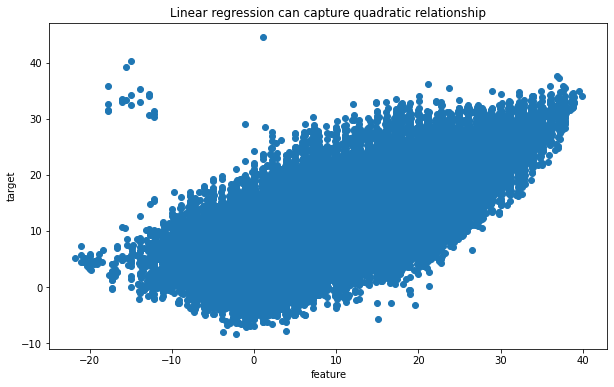

In [37]:
predictions = gaus_as1.predict(df_x_sq)

print("Coefficents : {}".format(gaus_as1.coef_))
print("Intercept  :  {}".format(gaus_as1.intercept_))

plt.figure(figsize =(10,6))
plt.scatter(y, predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [38]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,1016.510,Partly cloudy throughout the day.


In [39]:
# Assumption two : the error term should be zero on average
X = weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is : {}".format(np.mean(errors)))
#It's almost zero.

Mean of the errors in the medical costs model is : -2.9429698425396953e-15


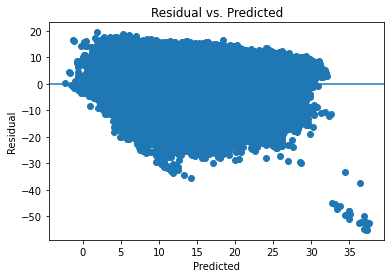

In [40]:
# Assumption three: homoscedasticity

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [41]:
from scipy.stats import bartlett
from scipy.stats import levene


bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


*The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.*

In [42]:
# Assumption four: low multicollinearity

s = weather.select_dtypes(include = "object").columns
s

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')

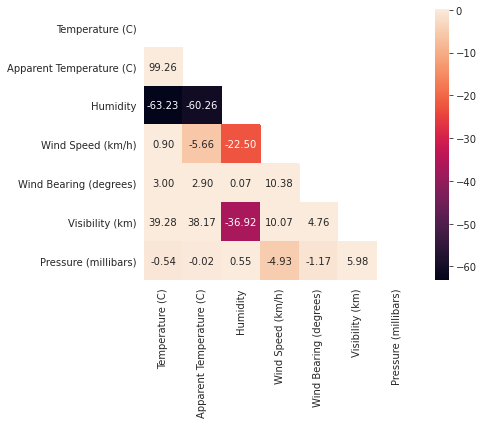

In [43]:
corr = weather.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr*100, annot = True, mask=mask, vmax=.3, square=True, fmt =".2f")

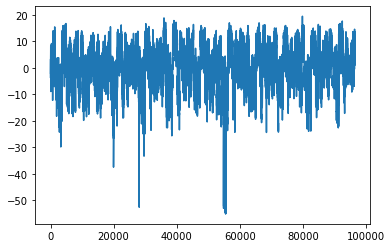

In [44]:
# Assumption five: error terms should be uncorrelated with one other

plt.plot(errors)
plt.show()

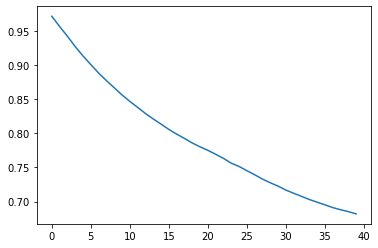

In [45]:
# autocorrelation function

from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

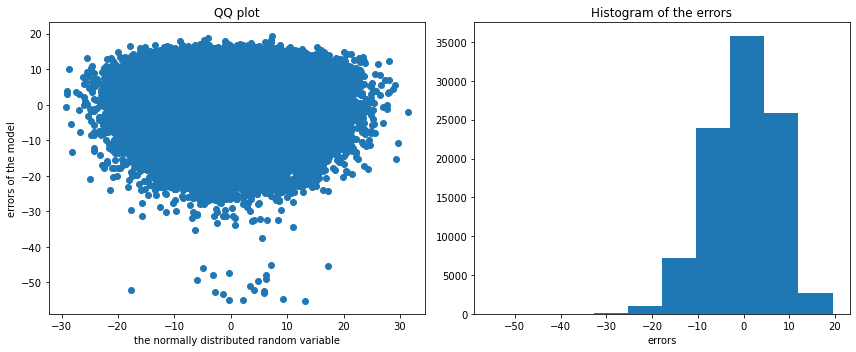

In [46]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [47]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [48]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252351 and p value is 0.0
Normality test statistics is 3375.4323076995734 and p value is 0.0


Not normally distributed.

# 2. House prices

In [69]:
house_prices = pd.read_csv("data/houseprices.csv")
house = house_prices.select_dtypes(exclude='object')
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000,8450,7,5,2003,2003,196.000,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000,9600,6,8,1976,1976,0.000,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000,11250,7,5,2001,2002,162.000,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.000,9550,7,5,1915,1970,0.000,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.000,14260,8,5,2000,2000,350.000,655,0,...,192,84,0,0,0,0,0,12,2008,250000


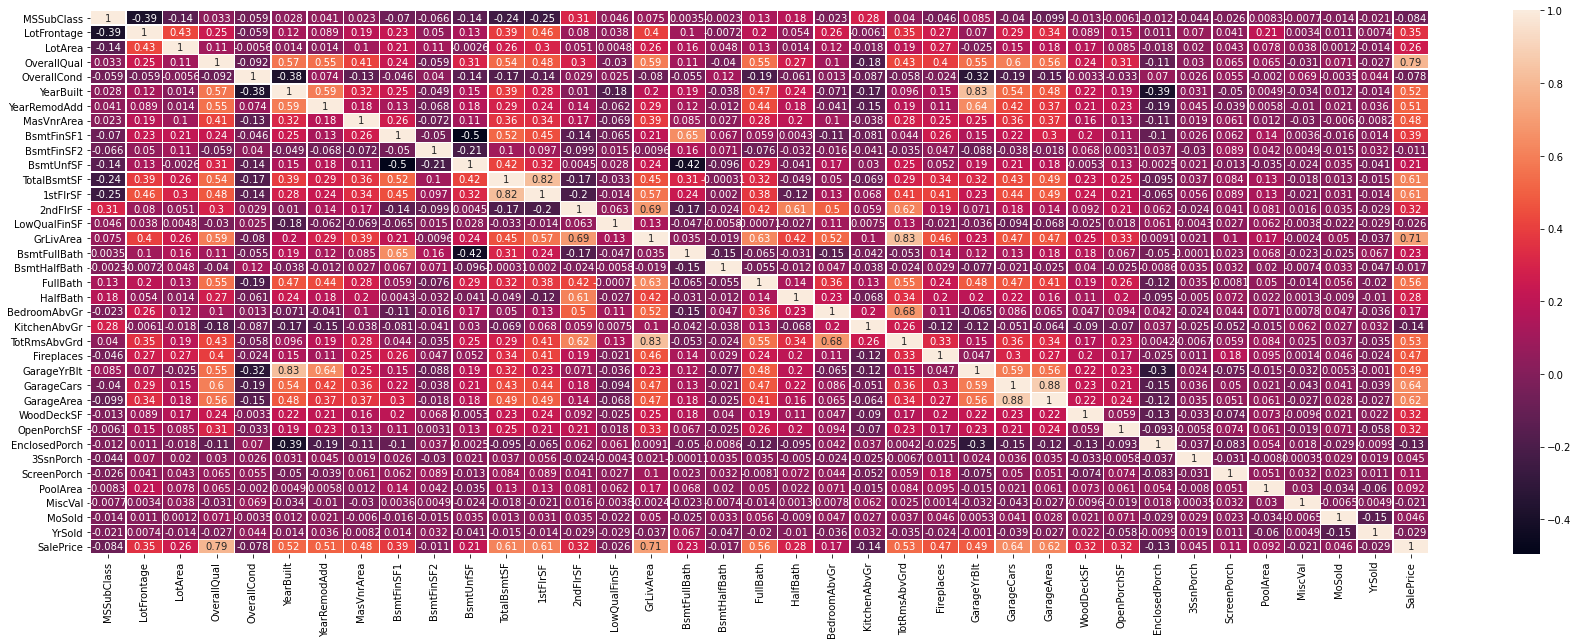

In [70]:
plt.figure(figsize=(30,10))
sns.heatmap(house.corr(),lw = .5,annot_kws={"size":10}, annot = True)

In [51]:
# "OverallQual","GrLivArea","GarageCars","GarageArea","1stFlrSF","YearBuilt"

In [52]:
X = house[["OverallQual","GrLivArea","GarageCars","GarageArea","1stFlrSF","YearBuilt"]]

Y = house["SalePrice"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [54]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [56]:
# 1. Assumption one: linearity of the model in the coefficients

df_x = X_train
df_x_sq = df_x.copy()


for i in df_x:
    for j in df_x:
        name = i + j
        a = df_x_sq[i] 
        b= df_x_sq[j]
        df_x_sq[name]= a*b

In [57]:
model = linear_model.LinearRegression()
model.fit(df_x_sq,y_train)

LinearRegression()

In [58]:
train_preds = model.predict(df_x_sq)

In [59]:
# 1. Assumption one: linearity of the model in the coefficients

df_x = X_test
df_x_sq = df_x.copy()


for i in df_x:
    for j in df_x:
        name = i + j
        a = df_x_sq[i] 
        b= df_x_sq[j]
        df_x_sq[name]= a*b

Coefficents : [ 4.30215920e+04 -3.28869895e+02  3.78007562e+05 -2.02557469e+03
  3.49894733e+02  1.13497735e+03 -6.36877374e+01  4.70556998e+00
  3.32794996e+03 -6.43819347e+00  1.05565548e+01 -1.75448528e+01
  4.70556788e+00  1.96185716e-02  8.48464334e+00 -1.10236609e-02
 -4.57822216e-02  8.68893138e-02  3.32795000e+03  8.48462738e+00
 -1.16634647e+04 -1.59167842e+00  8.01523698e+00 -1.03810524e+02
 -6.43820718e+00 -1.04797111e-02 -1.59167843e+00  1.26429981e-01
 -3.24066535e-02  5.33036077e-01  1.05565366e+01 -4.52405524e-02
  8.01523761e+00 -3.23756515e-02  2.33251392e-02 -8.98252616e-02
 -1.75448842e+01  8.68844597e-02 -1.03810524e+02  5.33204625e-01
 -8.96412734e-02 -1.98059622e-01]
Intercept  :  -1336036.8378071003


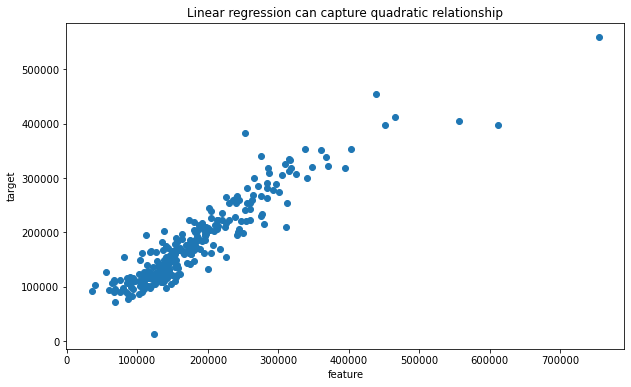

In [60]:
test_preds = model.predict(df_x_sq)

print("Coefficents : {}".format(model.coef_))
print("Intercept  :  {}".format(model.intercept_))

plt.figure(figsize =(10,6))
plt.scatter(y_test, test_preds)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [61]:
# Assumption two : the error term should be zero on average

errors = y_test - test_preds

print("Mean of the errors in the medical costs model is : {}".format(np.mean(errors)))
#It's almost zero.

Mean of the errors in the medical costs model is : 1814.294357879089


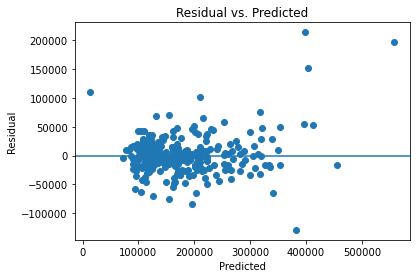

In [62]:
# Assumption three: homoscedasticity

plt.scatter(test_preds, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [63]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(test_preds, errors)
lev_stats = levene(test_preds, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 172.179 and p value is 2.47e-39
Levene test statistic value is 97.625 and p value is 2.18e-21


In [64]:
# Assumption four : low multicollinearity

# ?????????????
house.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,-0.066,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,0.050,...,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.352
LotArea,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,0.111,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
OverallQual,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,-0.059,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
OverallCond,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,0.040,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078
YearBuilt,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,-0.049,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523
YearRemodAdd,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,-0.068,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507
MasVnrArea,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,-0.072,...,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477
BsmtFinSF1,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,-0.050,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386
BsmtFinSF2,-0.066,0.050,0.111,-0.059,0.040,-0.049,-0.068,-0.072,-0.050,1.000,...,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,-0.015,0.032,-0.011


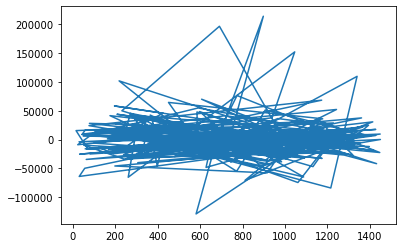

In [65]:
# 5. Assumption five: error terms should be uncorrelated with one other

plt.plot(errors)
plt.show()

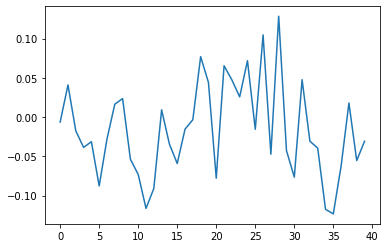

In [66]:
# autocorelation
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

* range - > (-0.1,0.1)

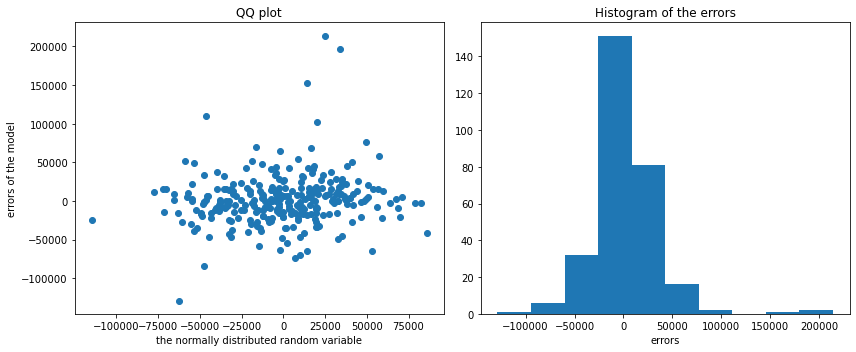

In [67]:
# 6. Assumption six: features shouldn't be correlated with the errors

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [68]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1430.505215817966 and p value is 0.0
Normality test statistics is 140.98890548978414 and p value is 2.424645038801082e-31


* The p-values of both tests indicate that our errors are not normally distributed.